In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
# 위의 __future__ statement 는 파이썬 2.x 코드가 파이썬 3.x 처럼 작동하게 해줍니다. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import seaborn as sns

In [3]:
pd.options.display.float_format = '{:.1f}'.format
pd.options.display.max_rows = 10
print('imported modules')

imported modules


In [4]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index))
# train_df = train_df.sample(frac=1)
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [5]:
# Z convert
train_df_norm = (train_df - train_df.mean())/train_df.std()
test_df_norm = (test_df - test_df.mean())/test_df.std()
print('Normalize the values')

Normalize the values


In [6]:
feature_columns = []

 We scaled all the columns, including latitude and longitude, into their Z scores. So, instead of picking a resolution in degrees, we're going to use resolution_in_Zs.  A resolution_in_Zs of 1 corresponds to a full standard deviation. 

In [7]:
train_df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
7610,0.6,-0.7,0.4,0.2,0.8,-0.1,0.9,0.1,2.5
9468,0.1,0.1,0.3,-0.6,-0.5,-0.1,-0.4,-1.2,-1.4
14944,-1.3,0.9,0.6,1.6,1.2,1.4,1.5,0.9,1.2
4677,0.7,-0.8,-0.9,1.0,1.5,2.1,1.6,-0.7,-0.6
6932,0.6,-0.7,0.2,-0.2,0.7,0.7,0.6,-1.1,0.7


In [8]:
resolution_in_Zs = 0.3

In [9]:
# Create a bucket feature column for latidude
latitude_as_a_numeric_column = tf.feature_column.numeric_column('latitude')
latitude_boundaries = list(np.arange(int(min(train_df_norm['latitude'])), 
                                     int(max(train_df_norm['latitude'])),
                                    resolution_in_Zs))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

In [10]:
# Create a bucket feature column for longitude
longitude_as_a_numeric_column = tf.feature_column.numeric_column('longitude')
longitude_boundaries = list(np.arange(int(min(train_df_norm['longitude'])),
                                     int(max(train_df_norm['longitude'])),
                                     resolution_in_Zs))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)

In [11]:
# Create a feature cross of latitude and longitude
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)

In [12]:
# Represent median_income as a floating-point value
median_income = tf.feature_column.numeric_column('median_income')
feature_columns.append(median_income)

In [13]:
# Represent population as a floating-point value.
population = tf.feature_column.numeric_column("population")
feature_columns.append(population)

In [14]:
# Convert the list of feature columns into a layer that will later be fed into the model
my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [15]:
def plot_the_loss_curve(epochs, mse):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    
    plt.plot(epochs, mse, label='Loss')
    plt.legend()
    plt.ylim([mse.min()*0.95, mse.max()*1.03])
    plt.show()
    
print('Defined the plot_the_loss_curve function')

Defined the plot_the_loss_curve function


In [16]:
def create_model(my_learning_rate, feature_layer):
    model = tf.keras.models.Sequential()
    model.add(feature_layer)
    # Add one linear layer to the model to yield a simple linear regressor.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                 loss='mean_squared_error',
                 metrics=[tf.keras.metrics.MeanSquaredError()])
    
    return model

In [17]:
def train_model(model, dataset, epochs, batch_size, label_name):
    
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features, y=label, batch_size=batch_size, epochs=epochs, shuffle=True)
    
    # Get details that will be useful for plotting the loss curve.
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    rmse = hist['mean_squared_error']
    
    return epochs, rmse

print('Defined the create_model and train_model functions')

Defined the create_model and train_model functions


Epoch 1/15
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
17/17 [==============================] - 2s 5ms/step - loss: 0.8673 - mean_squared_error: 0.8673
Epoch 2/15
17/17 [==============================] - 0s 6ms/step - loss: 0.5860 - mean_squared_error: 0.5860
Epoch 3/15
17/17 [==============================] - 0s 7ms/step - loss: 0.4527 - mean_squared_error: 0.4527
Epoch 4/15
17/17 [==============================] - 0s 7ms/step - loss: 0.3897 - mean_squared_error: 0.3897
Epoch 5/15
17/17 [==============================] - 0s 5ms/step - loss: 0.3672 - mean_squared_error: 0.3672
Epoch 6/15
17/17 [==============================] - 0s 6ms/step - loss: 0.3621 - mean_squared_error: 0.3621
Epoch 7/15
17/17 [==============================] - 0s 8ms/step - loss: 0.3607 - mean_squared_error: 0.3607
Epoch 8/15
17/17 [==============================] - 0s 6ms/step - loss: 0.3602 - mean_squared_error: 0.3602
Epoch 9/15
17/17 [========

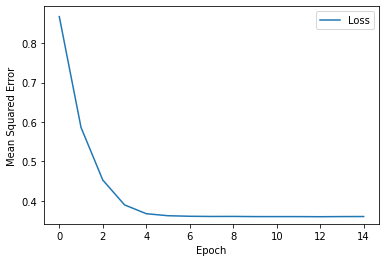

In [18]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 15
batch_size = 1000
label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
epochs, mse = train_model(my_model, train_df_norm, epochs, batch_size, label_name)
plot_the_loss_curve(epochs, mse)

In [19]:
test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the linear regression model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)


 Evaluate the linear regression model against the test set:
Consider rewriting this model with the Functional API.
3/3 [==============================] - 1s 6ms/step - loss: 0.3952 - mean_squared_error: 0.3952


[0.39523574709892273, 0.39523574709892273]

## Define a deep neural net model

The `create_model` function defines the topography of the deep neural net, specifying the following:

* The number of [layers](https://developers.google.com/machine-learning/glossary/#layer) in the deep neural net.
* The number of [nodes](https://developers.google.com/machine-learning/glossary/#node) in each layer.

The `create_model` function also defines the [activation function](https://developers.google.com/machine-learning/glossary/#activation_function) of each layer.

In [52]:
def create_model(my_learning_rate, my_feature_layer):
    model = tf.keras.models.Sequential()
    
    # Add the layer containing the feature columns to the model.
    model.add(my_feature_layer)
    
    # Describe the topography of the model by calling the tf.keras.layers.Dense
    # method once for each layer. We've specified the following arguments:
    #   * units specifies the number of nodes in this layer.
    #   * activation specifies the activation function (Rectified Linear Unit).
    #   * name is just a string that can be useful when debugging.
    
    # Define the first hidden layer with 20 nodes. 
    model.add(tf.keras.layers.Dense(units=20, activation='relu', name='Hidden1'))
    
    # Define the second hidden layer with 12 nodes. 
    model.add(tf.keras.layers.Dense(units=12, activation='relu', name='Hidden2'))
    
    # Define the output layer.
    model.add(tf.keras.layers.Dense(units=1, name='Output'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                 loss='mean_squared_error', metrics=[tf.keras.metrics.MeanSquaredError()])
    
    return model

## Define a training function

The `train_model` function trains the model from the input features and labels. The [tf.keras.Model.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit) method performs the actual training. The `x` parameter of the `fit` method is very flexible, enabling you to pass feature data in a variety of ways. The following implementation passes a Python dictionary in which:

* The *keys* are the names of each feature (for example, `longitude`, `latitude`, and so on).
* The *value* of each key is a NumPy array containing the values of that feature. 

**Note:** <span style="color:red">Although you are passing *every* feature to `model.fit`, most of those values will be ignored. Only the features accessed by `my_feature_layer` will actually be used to train the model.</span>

In [40]:
def train_model(model, dataset, epochs, label_name, batch_size=None):
    #Split the dataset into features and label
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features, y = label, epochs=epochs, batch_size=batch_size, shuffle=True)
    
    # The list of epochs is stored separately from the rest of history
    epochs = history.epoch
    
    # To track the pregression of training, 
    # gather a snapshot of the model's mean squared error at each epoch
    hist = pd.DataFrame(history.history)
    mse = hist['mean_squared_error']
    
    return epochs, mse


## Call the functions to build and train a deep neural net

Okay, it is time to actually train the deep neural net.  If time permits, experiment with the three hyperparameters to see if you can reduce the loss
against the test set.

Epoch 1/20
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
17/17 [==============================] - 1s 7ms/step - loss: 0.5499 - mean_squared_error: 0.5499
Epoch 2/20
17/17 [==============================] - 0s 6ms/step - loss: 0.3597 - mean_squared_error: 0.3597
Epoch 3/20
17/17 [==============================] - 0s 5ms/step - loss: 0.3453 - mean_squared_error: 0.3453
Epoch 4/20
17/17 [==============================] - 0s 6ms/step - loss: 0.3393 - mean_squared_error: 0.3393
Epoch 5/20
17/17 [==============================] - 0s 5ms/step - loss: 0.3370 - mean_squared_error: 0.3370
Epoch 6/20
17/17 [==============================] - 0s 8ms/step - loss: 0.3352 - mean_squared_error: 0.3352
Epoch 7/20
17/17 [==============================] - 0s 6ms/step - loss: 0.3346 - mean_squared_error: 0.3346
Epoch 8/20
17/17 [==============================] - 0s 5ms/step - loss: 0.3330 - mean_squared_error: 0.3330
Epoch 9/20
17/17 [========

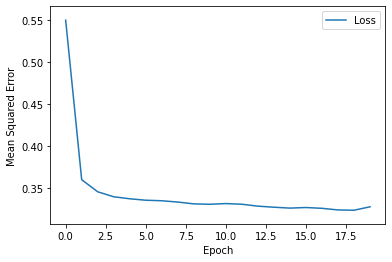

In [53]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 20
batch_size = 1000

# Specify the label
label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined by the feature_layer.
epochs, mse = train_model(my_model, train_df_norm, epochs, label_name, batch_size)
plot_the_loss_curve(epochs, mse)

In [54]:
# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)


 Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
3/3 [==============================] - 1s 5ms/step - loss: 0.3674 - mean_squared_error: 0.3674


[0.3674446642398834, 0.3674446642398834]

## Task 3: Regularize the deep neural network (if you have enough time)

Notice that the model's loss against the test set is *much higher* than the loss against the training set.  In other words, the deep neural network is [overfitting](https://developers.google.com/machine-learning/glossary/#overfitting) to the data in the training set.  To reduce overfitting, regularize the model.  The course has suggested several different ways to regularize a model, including:

  * [L1 regularization](https://developers.google.com/machine-learning/glossary/#L1_regularization)
  * [L2 regularization](https://developers.google.com/machine-learning/glossary/#L2_regularization)
  * [Dropout regularization](https://developers.google.com/machine-learning/glossary/#dropout_regularization)

Your task is to experiment with one or more regularization mechanisms to bring the test loss closer to the training loss (while still keeping test loss relatively low).  

**Note:** When you add a regularization function to a model, you might need to tweak other hyperparameters. 

### Implementing L1 or L2 regularization

To use L1 or L2 regularization on a hidden layer, specify the `kernel_regularizer` argument to [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense). Assign one of the following methods to this argument:

* `tf.keras.regularizers.l1` for L1 regularization
* `tf.keras.regularizers.l2` for L2 regularization

Each of the preceding methods takes an `l` parameter, which adjusts the [regularization rate](https://developers.google.com/machine-learning/glossary/#regularization_rate). Assign a decimal value between 0 and 1.0 to `l`; the higher the decimal, the greater the regularization. For example, the following applies L2 regularization at a strength of 0.05. 

```
model.add(tf.keras.layers.Dense(units=20, 
                                activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(l=0.01),
                                name='Hidden1'))
```

### Implementing Dropout regularization

You implement dropout regularization as a separate layer in the topography. For example, the following code demonstrates how to add a dropout regularization layer between the first hidden layer and the second hidden layer:

```
model.add(tf.keras.layers.Dense( *define first hidden layer*)
 
model.add(tf.keras.layers.Dropout(rate=0.25))

model.add(tf.keras.layers.Dense( *define second hidden layer*)
```

The `rate` parameter to [tf.keras.layers.Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) specifies the fraction of nodes that the model should drop out during training. 

Epoch 1/140
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
17/17 [==============================] - 2s 6ms/step - loss: 1.8910 - mean_squared_error: 0.7661
Epoch 2/140
17/17 [==============================] - 0s 5ms/step - loss: 0.8182 - mean_squared_error: 0.5102
Epoch 3/140
17/17 [==============================] - 0s 6ms/step - loss: 0.5605 - mean_squared_error: 0.4009
Epoch 4/140
17/17 [==============================] - 0s 7ms/step - loss: 0.4922 - mean_squared_error: 0.3812
Epoch 5/140
17/17 [==============================] - 0s 5ms/step - loss: 0.4677 - mean_squared_error: 0.3794
Epoch 6/140
17/17 [==============================] - 0s 5ms/step - loss: 0.4586 - mean_squared_error: 0.3782
Epoch 7/140
17/17 [==============================] - 0s 6ms/step - loss: 0.4487 - mean_squared_error: 0.3736
Epoch 8/140
17/17 [==============================] - 0s 5ms/step - loss: 0.4422 - mean_squared_error: 0.3717
Epoch 9/140
17/17 

17/17 [==============================] - 0s 8ms/step - loss: 0.3921 - mean_squared_error: 0.3515
Epoch 61/140
17/17 [==============================] - 0s 6ms/step - loss: 0.3892 - mean_squared_error: 0.3473
Epoch 62/140
17/17 [==============================] - 0s 8ms/step - loss: 0.3870 - mean_squared_error: 0.3468
Epoch 63/140
17/17 [==============================] - 0s 6ms/step - loss: 0.3874 - mean_squared_error: 0.3463
Epoch 64/140
17/17 [==============================] - 0s 5ms/step - loss: 0.3863 - mean_squared_error: 0.3460
Epoch 65/140
17/17 [==============================] - 0s 6ms/step - loss: 0.3869 - mean_squared_error: 0.3465
Epoch 66/140
17/17 [==============================] - 0s 6ms/step - loss: 0.3877 - mean_squared_error: 0.3471
Epoch 67/140
17/17 [==============================] - 0s 6ms/step - loss: 0.3863 - mean_squared_error: 0.3464
Epoch 68/140
17/17 [==============================] - 0s 5ms/step - loss: 0.3885 - mean_squared_error: 0.3489
Epoch 69/140
17/17 [===

17/17 [==============================] - 0s 9ms/step - loss: 0.3741 - mean_squared_error: 0.3426
Epoch 134/140
17/17 [==============================] - 0s 6ms/step - loss: 0.3745 - mean_squared_error: 0.3420
Epoch 135/140
17/17 [==============================] - 0s 5ms/step - loss: 0.3745 - mean_squared_error: 0.3423
Epoch 136/140
17/17 [==============================] - 0s 5ms/step - loss: 0.3736 - mean_squared_error: 0.3418
Epoch 137/140
17/17 [==============================] - 0s 6ms/step - loss: 0.3740 - mean_squared_error: 0.3425
Epoch 138/140
17/17 [==============================] - 0s 5ms/step - loss: 0.3734 - mean_squared_error: 0.3419
Epoch 139/140
17/17 [==============================] - 0s 5ms/step - loss: 0.3772 - mean_squared_error: 0.3454
Epoch 140/140
17/17 [==============================] - 0s 5ms/step - loss: 0.3780 - mean_squared_error: 0.3465


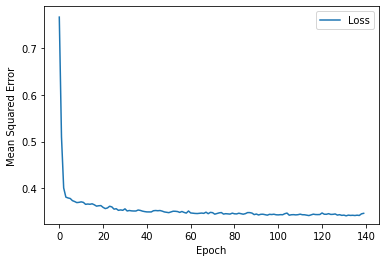


 Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
3/3 [==============================] - 1s 7ms/step - loss: 0.4147 - mean_squared_error: 0.3830


[0.41469335556030273, 0.3830486536026001]

In [61]:
# The following "solution" uses L2 regularization to bring training loss
# and test loss closer to each other. Many, many other solutions are possible.

def create_model(my_learning_rate, my_feature_layer):
  """Create and compile a simple linear regression model."""

  # Discard any pre-existing version of the model.
  model = None

  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(my_feature_layer)

  # Describe the topography of the model. 

  # Implement L2 regularization in the first hidden layer.
  model.add(tf.keras.layers.Dense(units=20, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.04),
                                  name='Hidden1'))
  
  # Implement L2 regularization in the second hidden layer.
  model.add(tf.keras.layers.Dense(units=12, 
                                  activation='relu', 
                                  kernel_regularizer=tf.keras.regularizers.l2(0.04),
                                  name='Hidden2'))

  # Define the output layer.
  model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output'))                              
  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model     

# Call the new create_model function and the other (unchanged) functions.

# The following variables are the hyperparameters.
learning_rate = 0.007
epochs = 140
batch_size = 1000

label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
epochs, mse = train_model(my_model, train_df_norm, epochs, 
                          label_name, batch_size)
plot_the_loss_curve(epochs, mse)

test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size) 